# Co trzeba zrealizować:
## Regresja logistyczna
1. Zaimportować potrzebne biblioteki
2. Wczytać odpowiedni zbiór danych 20pkt
3. Podać jakie mamy klasy, liczbę próbek w zbiorze i liczbę próbek w każdej klasie 10 pkt
4. Wyuczyć model regresji logistycznej dla wybranego zbioru danych przy domyślnych hiperparametrach 20 pkt
5. Podać dokładność rozpoznawania 10 pkt
6. Obliczyć macierz pomyłek i odpowiednio ją wydrukować 10 pkt

RAZEM 70 pkt

## 1. Przygotowanie bibliotek i

In [1]:
# 1. Zaimportowane biblioteki

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics

## 2. Wczytanie danych

In [2]:
# 2. a) Wczytanie danych

df_train = pd.read_csv("fashion-mnist_train.csv")
df_train.head()

df_test = pd.read_csv("fashion-mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 2. b) Wydzienie parametru klasy

y_train = df_train["label"]
y_test = df_test["label"]
print(y_train.head())

X_train = df_train.copy().drop(["label"], axis=1)
X_test = df_test.copy().drop(["label"], axis=1)
X_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Analiza struktury zbioru

In [4]:
# 3. a) Rozmiar zbioru (l. próbek, l. pixeli)

print(f"Training set: {df_train.shape}")
print(f"Testing set: {df_test.shape}")

Training set: (60000, 785)
Testing set: (10000, 785)


In [5]:
# 3. b) Liczba próbek w każdej klasie

print(f"Training set: \n{y_train.value_counts().sort_index()}\n")
print(f"Testing set: \n{y_test.value_counts().sort_index()}\n")

Training set: 
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

Testing set: 
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: label, dtype: int64



In [6]:
# 3. c) Podpisy klas

lables_dic = {0: "T-shirt/top",
              1: "Trouser",
              2: "Pullover",
              3: "Dress",
              4: "Coat",
              5: "Sandal",
              6: "Shirt",
              7: "Sneaker",
              8: "Bag",
              9: "Ankle boot"}

## Prezentacja przykładowych danych

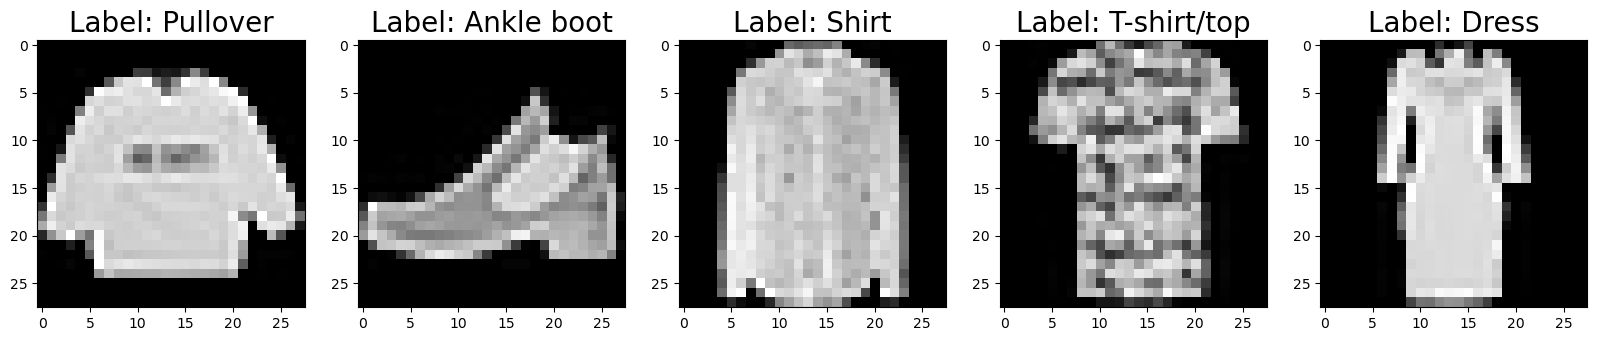

In [7]:
img_size = (28, 28)
plt.figure(figsize=(20, 4))
for i, (img, label) in enumerate(zip(X_train.values[0:5], y_train.values[0:5])):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(img, img_size), cmap=plt.cm.gray)
    plt.title(f"Label: {lables_dic[label]}", fontsize=20)

## 4. Uczenie modelu

In [8]:
# 4. a) Uczenie modelu regresji logistycznej

iterations = 1000
print(f"Number of max iterations: {iterations}")
log_regr = linear_model.LogisticRegression(max_iter=1000)
log_regr.fit(X_train, y_train)

Number of max iterations: 1000


D:\Programs\ML Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## 5. Predykcja oraz dokładność rozpoznania

In [9]:
# 5. Predykcja oraz jej błąd / wynik

y_pred = log_regr.predict(X_test)

score = log_regr.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")
print(f"Mean squared log error: {metrics.mean_squared_log_error(y_test, y_pred)}")
print(f"Mean squared error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred)}")

Accuracy of model (score): 0.8449
Mean squared log error: 0.16723237964588397
Mean squared error: 2.0999
Coefficient of determination: 0.7454666666666667


## 6. Macierz pomyłek

[[809   7  16  36   6   1 105   0  20   0]
 [  2 970   5  15   2   1   5   0   0   0]
 [ 19   8 758  11 116   0  80   0   8   0]
 [ 32  25  18 856  33   0  23   1  11   1]
 [  1   2  80  31 799   0  81   0   5   1]
 [  1   4   0   0   0 885   0  67   8  35]
 [156  10 101  38  98   0 582   0  15   0]
 [  0   0   0   0   0  27   0 914   3  56]
 [  7   1   9   8   5  10  23   6 930   1]
 [  0   0   0   0   0  15   0  38   1 946]]


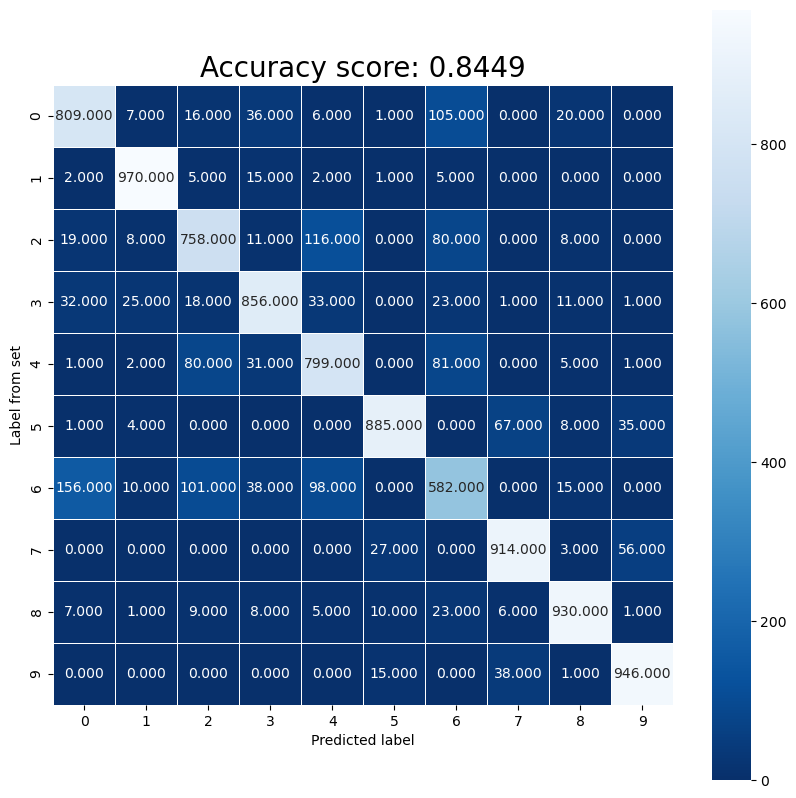

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [10]:
# 6. Macierz pomyłek w formie tekstowej oraz graficznej

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5,
           square=True, cmap="Blues_r")
plt.ylabel("Label from set")
plt.xlabel("Predicted label")
plt.title(f"Accuracy score: {score}", size=20)
plt.show()

print(lables_dic)